**Student:** Michele Cristina Otta

# Computer Vision
Data Science Track -> MNIST classification

In [10]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

In [11]:
# holdout validation  ->  60% train, 20% validation, 20% test
# 60% train, 40% (validation + test)
x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=0.4, random_state=42)

# 40% -> 20% validation 20% test
x_val, x_test, y_val, y_test = train_test_split(x_rest, y_rest, test_size=0.5, random_state=42)

print(f'Training: {x_train.shape}, Validation: {x_val.shape}, Test: {x_test.shape}')

Training: (42000, 28, 28), Validation: (14000, 28, 28), Test: (14000, 28, 28)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# LeNet-5 CNN model
x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', padding='same'),
    AveragePooling2D(pool_size=(2, 2)),

    Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
    AveragePooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(units=120, activation='tanh'),
    Dense(units=84, activation='tanh'),
    Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# train LeNet-5 CNN
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8599 - loss: 0.4654 - val_accuracy: 0.9569 - val_loss: 0.1402
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9642 - loss: 0.1160 - val_accuracy: 0.9668 - val_loss: 0.1058
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9781 - loss: 0.0744 - val_accuracy: 0.9773 - val_loss: 0.0705
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9840 - loss: 0.0519 - val_accuracy: 0.9747 - val_loss: 0.0790
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9877 - loss: 0.0405 - val_accuracy: 0.9791 - val_loss: 0.0637
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9914 - loss: 0.0288 - val_accuracy: 0.9802 - val_loss: 0.0625
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9912 - loss: 0.0270 - val_accuracy: 0.9831 - val_loss: 0.0575
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9939 - loss: 0.0190 -

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


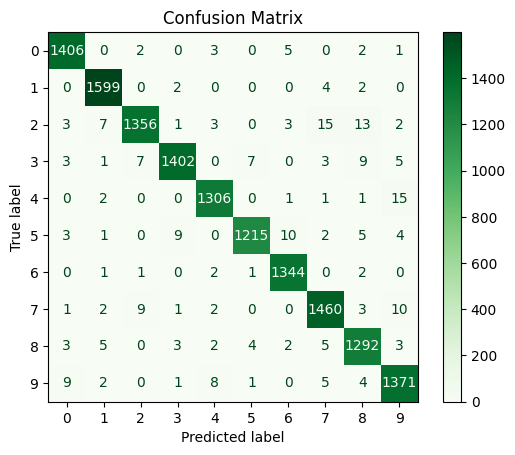

In [17]:
# show confusion matrix
predictions = model.predict(x_test)
pred_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()

# References
* [How To Import The MNIST Dataset Using Tensorflow](https://github.com/MrDataScience/tutorials/blob/master/Data/MNIST/How%20To%20Import%20The%20MNIST%20Dataset%20Using%20Tensorflow.ipynb)
* [LeNet-5 in 9 lines of code using Keras](https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086)
* [mnist-keras.ipynb](https://colab.research.google.com/drive/1CVm50PGE4vhtB5I_a_yc4h5F-itKOVL9#scrollTo=FaKozfPjYIpF)